# LSI flood event
### November sensitivity with CYD/ROX low offers

This notebook looks at changing offers for Roxburgh and Clyde hydro generating stations (to $6.35/MWh) when these stations were spilling prior to the UTS period.  Some additional Python code (below) was required to handle this situation as hydro spilling at these stations occurred on and off throughout this period.  Note: we have not yet checked the hydrological outcome of these simulations so it is possible that the outcome of these vSPD runs is not possible.

### vSPD simulations

Along with the original vSPD run1 simulation results with Manapouri only offered low while spilling, three additional vSPD runs were required to investigate the potential effect of adjusting offer prices while Roxburgh and Clyde hydro stations were spilling:

  - a repeat run of the vSPD run1 period with Manapouri and Roxburgh offered low,
  - a repeat run of the vSPD run1 period with Manapouri/Roxburgh and Clyde offered low, and
  - a repeat run of the vSPD run2 period with MAN/ROX/CYD/AVI and WTK all offered low.

A new function (piece_together_vSPD_run1 - below) was created that, based on when each hydro generator was spilling, stitches these two new vSPD run1 simulations together with the original vSPD simulation (with only Manapouri spilling) depending on three different combinations of hydro spill.  As detailed more below.  

The three input spill stages are: 

  - Manapouri only spilling
  - Manapouri and Roxburgh spilling, and finally,
  - Manapouri, Roxburgh and Clyde spilling.  
  
The output of running this function is a new set of vSPD results for the original vSPD run 1 period which attempts to take into account all hydro spilling stages during this period.  

vSPD run2 falls inside the vSPD run1 time period.   We have re-run vSPD run2, to include MAN/ROX/CYD/AVI and WTK spilling between 2019-11-15 and 2019-11-18, we use the raw vSPD output results for this as for most of the time (aside for on two short occasions when Clyde hydro station was not spilling), all of these generators were spilling. 

Once we have these two new vSPD results with low offers for all LSI hydro generation, we then reprocess the vSPD results - as per our initial analysis. 

We have not yet tested these simulated vSPD results against the hydrological flows that occurred during the flood event.  This means that there is a possibility that the output of these simulations may not have been possible, hydrologically. 

The seven original time periods are:

  - vSPD run1 (~6 days and ~13 days) 2019-11-09 -> 2019-12-02 MAN spilling
  - vSPD run2 (~4 days) 2019-11-15 -> 2019-11-18) MAN/AVI/WTK spilling
  - vSPD run3 (~5 days) 2019-12-03 -> 2019-12-07 MAN/CYD/ROX/BEN/AVI/WTK spilling
  - vSPD run4 (~20 days) 2019-12-08 -> 2019-12-27 MAN/OHA/OHB/OHC/BEN/AVI/WTK/ROX/CYD all spilling
  - vSPD run5 (~3 days) 2019-12-28 -> 2019-12-30 MAN/OHA/OHB/OHC/BEN/AVI/WTK all spilling
  - vSPD run6 (~6 days) 2019-12-31 -> 2020-01-05 MAN/BEN/AVI/WTK spilling
  - vSPD run7 (~10 days) 2020-01-06 -> 2020-01-16 MAN/AVI/WTK spilling

In [1]:
import pandas as pd
%pylab inline
from datetime import date, datetime, time, timedelta

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Sensitivity with ROX/CYD spilling for runs 1 and 2
#run1_6pt35ROX 
#run1_6pt35ROXCYD
#run2_6pt35ROXCYD

def piece_together_vSPD_run1(run_MAN, run_MANROX, run_MANROXCYD, ROX_BOOLEAN, ROX_CYD_BOOLEAN, files):
    """For run 1 we have several vSPD runs that require stitching together depending on spill periods.
    The first run is run_MAN which is the original vSPD results of low offers at MAN only,
    The second run is run_MANROX with MAN and ROX offered low, 
    The third run is run_MANROXCYD with MAN/ROX and CYD offered low.  
    ROX_BOOLEAN is a timeseries True/False boolean which is True when ROX is spilling.
    ROX_CYD_BOOLEAN is a timeseries True/False boolean which is True when ROX and CYD are spilling.
    MAN is spilling over the entire period.
    """
    run = {}
    MAN_BOOLEAN = ((ROX_BOOLEAN==False) & (ROX_CYD_BOOLEAN==False))  # MAN spill only
    
    for k in files.keys():
        run_MAN[k] = run_MAN[k][run_MAN[k].index.get_level_values(0).isin(MAN_BOOLEAN[MAN_BOOLEAN].index)] 
        run_MANROX[k] = run_MANROX[k][run_MANROX[k].index.get_level_values(0).isin(ROX_BOOLEAN[ROX_BOOLEAN].index)] 
        run_MANROXCYD[k] = run_MANROXCYD[k][run_MANROXCYD[k].index.get_level_values(0).isin(ROX_CYD_BOOLEAN[ROX_CYD_BOOLEAN].index)] 
        
        # append timeseries run results together then sort on index
        run[k] = run_MAN[k].append(run_MANROX[k].append(run_MANROXCYD[k]))  
        run[k] = run[k].sort_index()
    return run


In [3]:
# get some nice colours and define better legend and plot formatting...

c_p = {'rd2': (0.9647058823529412, 0.5450980392156862, 0.6352941176470588), 'yl1': (1.0, 0.7294117647058823, 0.17647058823529413), 'gy2': (0.9098039215686274, 0.9098039215686274, 0.9098039215686274), 'bl2': (0.7176470588235294, 0.8901960784313725, 0.9725490196078431), 'yl2': (0.984313725490196, 0.8196078431372549, 0.5450980392156862), 'br1': (0.32941176470588235, 0.0, 0.0), 'bl1': (0.058823529411764705, 0.4823529411764706, 0.6862745098039216), 'rd1': (0.9294117647058824, 0.09019607843137255, 0.27058823529411763), 'gy1': (0.8235294117647058, 0.8235294117647058, 0.8235294117647058), 'br2': (0.6627450980392157, 0.5019607843137255, 0.5019607843137255)}
c_s = {'og1': (0.8235294117647058, 0.38823529411764707, 0.10196078431372549), 'yl1': (0.803921568627451, 0.8156862745098039, 0.0), 'or1': (1.0, 0.4823529411764706, 0.0), 'pp1': (0.27058823529411763, 0.1803921568627451, 0.6745098039215687), 'mv1': (0.0, 0.4588235294117647, 0.4235294117647059), 'rd2': (0.8470588235294118, 0.5882352941176471, 0.5019607843137255), 'pr1': (0.803921568627451, 0.34901960784313724, 1.0), 'pk2': (1.0, 0.7372549019607844, 0.8313725490196079), 'gr1': (0.00784313725490196, 0.4666666666666667, 0.2196078431372549), 'or2': (1.0, 0.7372549019607844, 0.5019607843137255), 'mv2': (0.5019607843137255, 0.7254901960784313, 0.7098039215686275), 'pp2': (0.6862745098039216, 0.6431372549019608, 0.7411764705882353), 'gn1': (0.3803921568627451, 0.7372549019607844, 0.22745098039215686), 'bu1': (0.0, 0.5568627450980392, 1.0), 'bl2': (0.5254901960784314, 0.7372549019607844, 0.8392156862745098), 'ge1': (0.0, 0.7019607843137254, 0.6196078431372549), 'yl2': (0.8980392156862745, 0.9058823529411765, 0.5019607843137255), 'bu2': (0.5019607843137255, 0.7725490196078432, 1.0), 'ge2': (0.5019607843137255, 0.8470588235294118, 0.807843137254902), 'rd1': (0.7019607843137254, 0.18823529411764706, 0.0), 'gy1': (0.5843137254901961, 0.5843137254901961, 0.5843137254901961), 'og2': (0.8901960784313725, 0.6901960784313725, 0.5490196078431373), 'gy2': (0.788235294117647, 0.788235294117647, 0.788235294117647), 'be2': (0.8862745098039215, 0.9490196078431372, 0.984313725490196), 'pk1': (1.0, 0.3411764705882353, 0.9607843137254902), 'be1': (0.7803921568627451, 0.9019607843137255, 0.9803921568627451), 'gr2': (0.5019607843137255, 0.7294117647058823, 0.7098039215686275), 'bl1': (0.058823529411764705, 0.4823529411764706, 0.6862745098039216), 'gn2': (0.6862745098039216, 0.8666666666666667, 0.611764705882353), 'pr2': (0.8980392156862745, 0.6705882352941176, 1.0)}

def colours():
    mpl.rcParams['axes.prop_cycle'] = cycler('color', [c_p['br1'], c_p['br2'],
        c_p['bl1'], c_p['bl2'], c_p['yl1'], c_p['yl2'], c_p['rd1'], c_p['rd2'],
        c_p['gy1'], c_p['gy2'], c_s['pp1'], c_s['pp2'], c_s['pr1'], c_s['pr2'],
        c_s['gr1'], c_s['gr2'], c_s['gn1'], c_s['gn2'], c_s['pk1'], c_s['pk2'],
        c_s['yl1'], c_s['yl2'], c_s['mv1'], c_s['mv2']])

def legend_format(ax, cols=4, xpos=-0.021, ypos=-0.15, **kwargs):
    """Place legend outside of plot"""
    ax.legend(loc=3,
              bbox_to_anchor=(xpos, ypos),
              ncol=cols,
              frameon=False, **kwargs)

def plot_formatting(ax, rot=False, **kwargs):
    """A few tricks used for better looking plots"""
    ax.grid(b=True, which='major', color='k', linestyle='-',
            axis='y', alpha=0.6, clip_on=True, marker=None)
    ax.grid(b=False, axis='x', which='both')
    ax.set_frame_on(False)  # Remove plot frame
    ax.set_axisbelow(True)
    ax.xaxis.tick_bottom()
    plt.xticks(ax.get_xticks(), rotation=0, **kwargs)
    if rot:
        plt.xticks(ax.get_xticks(), rotation=90, **kwargs)
    else:
        plt.xticks(ax.get_xticks(), rotation=0, **kwargs) 

        
def plot_shading(ax, y_offset, run_text_list=['vSPD run 1', 'vSPD run 1', 'vSPD run 2', 'vSPD_run3',
                                             'vSPD run 4', 'vSPD_run5', 'vSPD_run6', 'vSPD run 7']):
    """shade charts with each timeperiod simulation"""
    ax.axvspan(datetime(2019, 11, 9, 10), datetime(2019,12,2,16), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 11, 15, 8), datetime(2019,11,19,20), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 12, 2, 16), datetime(2019,12,8), color=c_p['rd2'], alpha=0.4)
    ax.axvspan(datetime(2019, 12, 8), datetime(2019,12,28), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 12, 28), datetime(2019,12,31), color=c_p['rd2'], alpha=0.4)
    ax.axvspan(datetime(2019, 12, 31), datetime(2020,1,6), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2020, 1, 6), datetime(2020,1,16), color=c_p['rd2'], alpha=0.4)
    ax.text(datetime(2019,11,10), y_offset, run_text_list[1])
    ax.text(datetime(2019,11,23), y_offset, run_text_list[1])
    ax.text(datetime(2019,11,15), y_offset, run_text_list[2])
    ax.text(datetime(2019,12,3), y_offset, run_text_list[3])
    ax.text(datetime(2019,12,16), y_offset, run_text_list[4])
    ax.text(datetime(2019,12,27), y_offset, run_text_list[5], rotation=0)
    ax.text(datetime(2020,1,1), y_offset, run_text_list[6])
    ax.text(datetime(2020,1,8), y_offset, run_text_list[7])

    
def UTS_period(ax):
    """UTS period plot shading..."""
    ax.axvspan(datetime(2019, 12, 3), datetime(2019, 12, 18), color=c_p['rd2'], alpha=0.4)

    
files={'brh_res': 'BranchResults_TP.csv',  # ignore brach results for speed + RAM issues
       'gen_res': 'OfferResults_TP.csv',
       'bid_res': 'BidResults_TP.csv', 'MNC_res': 'MNodeConstraintResults_TP.csv',
       'res_res': 'ReserveResults_TP.csv', 'nod_res': 'NodeResults_TP.csv',
       'bus_res': 'BusResults_TP.csv', 'brC_res': 'BrConstraintResults_TP.csv',
       'sum_res': 'SummaryResults_TP.csv', 'trd_res': 'TraderResults.csv',
       'sys_res': 'SystemResults.csv', 'scr_res': 'ScarcityResults_TP.csv'}
    
def vSPD_loader(path, case, files=files, csv=True):
    """load vSPD output data"""
    output = {}
    if csv:
        for k, v in files.items():
            filename = path + case + '_' + v[:-4] + '.csv'
            print('Loading: ' + filename)
            output[k] = pd.read_csv(filename, index_col=[0, 1], parse_dates=True)
            output[k].to_parquet(path + case + '_' + v[:-4] + '.parquet')
        return output
    else:  # use FAST parquet datafiles
        for k, v in files.items():
            filename = path + case + '_' + v[:-4] + '.parquet'
            print('Loading: ' + filename)
            df = pd.read_parquet(filename)
            df = df.groupby(level=[0, 1]).last()
            output[k] = df
        return output


def piece_together_vSPD_runs(run1, run2, run3, run4, run5, run6, run7, files):
    """given vSPD run data, output dictionary of dataframes pieced togther"""
    vSPDrun1Aa = "2019/11/9T10"     # start of MAN spilling (vSPD run 1A)
    vSPDrun1Ab = "2019/11/15T0730"  # end of   MAN spilling (vSPD run 1A)
    vSPDrun2a = "2019/11/15T08"     # start of MAN/AVI/WTK spilling (vSPD run 2)
    vSPDrun2b = "2019/11/19T1930"   # end of   MAN/AVI/WTK spilling (vSPD run 2)
    vSPDrun1Ba = "2019/11/19T2000"  # start of MAN spilling (vSPD run 1B)
    vSPDrun1Bb = "2019/12/02T1530"  # end of   MAN spilling (vSPD run 1B)
    vSPDrun3a = "2019/12/02T1600"   # start of MAN/CYD/ROX/BEN/AVI/WTK spilling (vSPD run 3)
    vSPDrun3b = "2019/12/07T2330"   # end of   MAN/CYD/ROX/BEN/AVI/WTK spilling (vSPD run 3)
    vSPDrun4a = "2019/12/08T0000"   # start of MAN/OHA/OHB/OHC/BEN/AVI/WTK/ROX/CYD spilling (vSPD run 4)
    vSPDrun4b = "2019/12/27T2330"   # end of   MAN/OHA/OHB/OHC/BEN/AVI/WTK/ROX/CYD spilling (vSPD run 4)
    vSPDrun5a = "2019/12/28T0000"   # start of MAN/OHA/OHB/OHC/BEN/AVI/WTK spilling (vSPD run 5)
    vSPDrun5b = "2019/12/30T2330"   # end of   MAN/OHA/OHB/OHC/BEN/AVI/WTK spilling (vSPD run 5)
    vSPDrun6a = "2019/12/31T0000"   # start of MAN/BEN/AVI/WTK spilling (vSPD run 6)
    vSPDrun6b = "2020/01/05T2330"   # end of   MAN/BEN/AVI/WTK spilling (vSPD run 6)
    vSPDrun7a = "2020/01/06T1600"   # start of MAN/AVI/WTK spilling (vSPD run 7)
    vSPDrun7b = "2020/01/16T2330"   # end of   MAN/AVI/WTK spilling (vSPD run 7)

    RUN1A = {}
    RUN2 = {}
    RUN1B = {}
    RUN3 = {}
    RUN4 = {}
    RUN5 = {}
    RUN6 = {}
    RUN7 = {}
    ALL_RUNS={}
    
    for k in files.keys():
        print(k)
        # main counterfactual vSPD run   
        RUN1A[k] = run1[k].unstack()[vSPDrun1Aa:vSPDrun1Ab].stack()
        RUN2[k] = run2[k].unstack()[vSPDrun2a:vSPDrun2b].stack()
        RUN1B[k] = run1[k].unstack()[vSPDrun1Ba:vSPDrun1Bb].stack()
        RUN3[k] = run3[k].unstack()[vSPDrun3a:vSPDrun3b].stack()
        RUN4[k] = run4[k].unstack()[vSPDrun4a:vSPDrun4b].stack()
        RUN5[k] = run5[k].unstack()[vSPDrun5a:vSPDrun5b].stack()
        RUN6[k] = run6[k].unstack()[vSPDrun6a:vSPDrun6b].stack()
        RUN7[k] = run7[k].unstack()[vSPDrun7a:vSPDrun7b].stack()

        # append timeseries runs together
        ALL_RUNS[k] = RUN1A[k].append(RUN2[k].append(RUN1B[k].append(RUN3[k].append(RUN4[k].append(RUN5[k].append(RUN6[k].append(RUN7[k])))))))  # orig vSPD counterfactual run result
        
    return ALL_RUNS


def get_hvdc_flow(df):
    """given branch flow datafram return HVDC flow"""
    BEN_HAY_BC = df['brh_res']['Flow (MW) (From->To)'].unstack().loc[:, ['BEN_HAY2.1', 'BEN_HAY1.1']].sum(axis=1)
    HAY_BEN_BC = df['brh_res']['Flow (MW) (From->To)'].unstack().loc[:, ['HAY_BEN2.1', 'HAY_BEN1.1']].sum(axis=1)
    df = (BEN_HAY_BC-HAY_BEN_BC)
    return df


def calc_diff_sys_cost(bc, run):
    """given basecase vSPD run and pieced together run, return total differnce in System Load cost"""
    bc_sys_res = bc['sys_res'].sort_index().reset_index(level=1, drop=True)
    run_sys_res = run['sys_res'].sort_index().reset_index(level=1, drop=True)
    diff_sys_cost = bc_sys_res['SystemLoadCost ($)']-run_sys_res['SystemLoadCost ($)']
    return diff_sys_cost


def determine_BEN_generation(case, RMG_LSI, BEN_CUMEC, CUMECs_to_MW, lower_limit=340, upper_limit=760, POCP_BEN_MAX=True,
                             LSI_GENS=['OHA2201 OHA0', 'OHB2201 OHB0', 'OHC2201 OHC0', 'BEN2202 BEN0', 'AVI2201 AVI0',
                                       'WTK0111 WTK0', 'CYD2201 CYD0', 'ROX2201 ROX0', 'ROX1101 ROX0', 'MAN2201 MAN0']):
    """Ok, given the vSPD case dict and RMG data, and Benmore spillway constraints, determine possible Ben generation in Dec 2019.
       We first get the LSI generation data from the vSPD simulation (df_gen).  We then get actual LSI generation (minus Benmore), 
       what was actually generated from RM data (RMG_LSI2).  We then get the difference in total vSPD LSI generation and what was
       actually generated for Dec 2019.  We clip this, either to Benmores max generation (for 2019), or if POCP_BEN_MAX is true, 
       we clip to the BEN_CUMEC['Max Generation'] timeseries - to get a potential synthesized Benmore generation time series.  
       We then subtract actual Ben RM generation to get additional generation over and above what actually occurred (BEN_add).
       
       This additional Benmore generation is then converted from MW to CUMECs and two new columns added to the BEN_CUMEC dataframe (copied 
       to a new memory reg to BEN_CUMEC_new (and returned for testing));
       The columns, BEN_CUMEC_new['New Benmore flow'] adds this new flow to the Ben generation cumecs and BEN_CUMEC_new['New Spillway flow']
       subtracts the same amount from the spillway cumecs.  This way total throughflow - spillway+generation remains const.
       We then filter trading periods with the spillway logic, returning only those periods that satisfy the spillway constraints in 
       BEN_CUMEC_new.  Finally, we calculate the difference in spillway flow (add_ben_spill) and then convert this to MW (add_ben_spill_MW).
       """
    
    df_gen = case['gen_res']['Generation (MW)'].unstack().loc[:, LSI_GENS]
    df_gen.index = df_gen.index.map(lambda x: x-timedelta(seconds=60*15))  # time shift by 15 minutes.
    
    RMG_LSI2 = RMG_LSI.drop(columns='BEN2202')
    BEN_ADDed = (df_gen.sum(axis=1)["2019/12"])-(RMG_LSI2.sum(axis=1)["2019/12"])
    if POCP_BEN_MAX:
        BEN_ADDed_clipped = BEN_ADDed.clip_upper(CUMECs_to_MW*BEN_CUMEC['Max Generation'])  # use Max. Ben generation time-series - with POCP outages inc.
    else:
        BEN_ADDed_clipped = BEN_ADDed.clip_upper(RMG_LSI['BEN2202'].max())  # otherwise clip by the 2019 max Ben generation RM MW.
    # work out additional Benmore generation and convert to CUMECs for testing against spillway constraints
    BEN_add = (BEN_ADDed_clipped-RMG_LSI['BEN2202'])
    BEN_add_CUMECS = BEN_add/CUMECS_to_MW  # ie, multiplied by 1.223.
    print(BEN_add.mean())
    #test = BEN_add_CUMECS/BEN_add  # cumecs/MW should equal 1.223
    #print(test)
    # now we need to ensure spillway constraints are met
    BEN_CUMEC_new = BEN_CUMEC.copy()
    BEN_CUMEC_new['New Benmore flow'] = BEN_CUMEC_new.Generation + BEN_add_CUMECS
    BEN_CUMEC_new['New Spillway flow'] = (BEN_CUMEC_new.Spillway - BEN_add_CUMECS).clip_lower(0)
    # Ignore if new spill is in the no-go zone
    BEN_CUMEC_new = BEN_CUMEC_new.loc[(BEN_CUMEC_new['New Spillway flow']<lower_limit) | (BEN_CUMEC_new['New Spillway flow']>upper_limit),:]
    # calculate difference in spill
    add_ben_spill = (BEN_CUMEC_new['Spillway']-BEN_CUMEC_new['New Spillway flow']).clip_lower(0)
    add_ben_spill_MW = add_ben_spill*CUMECS_to_MW
    MWspill=int((add_ben_spill_MW.cumsum()/2).iloc[-1]/(31*24))  # MWh spill in Dec 2019
    BEN_CUMEC_new = BEN_CUMEC_new.loc[BEN_CUMEC_new['Spillway']!=BEN_CUMEC_new['New Spillway flow'],:]
    #print(BEN_CUMEC_new.head())
    BEN_CUMEC_new = BEN_CUMEC_new.reindex(BEN_CUMEC.index) 
    return BEN_CUMEC_new, add_ben_spill_MW/2000.0, MWspill


def plot_ben_flows(df_periods_new, offer):
    """"""
    
    # Logic check - total Benmore flow and before should be equal
    fig = plt.figure(1, figsize=[16,22])
    ax = fig.add_subplot(311)
    new_through_flow_check = df_periods_new['New Spillway flow']+ df_periods_new['New Benmore flow']
    old_through_flow_check = df_periods_new['Generation'] + df_periods_new['Spillway']
    df1 = pd.DataFrame({'New Benmore total through flow': new_through_flow_check,
                      'Old Benmore total through flow': old_through_flow_check})
    df1['New Benmore total through flow'].plot(ax=ax, color=c_s['or1'], lw=4, label='Simulated Benmore total flow')
    df1['Old Benmore total through flow'].plot(ax=ax, color=c_p['br1'], lw=1, label='Actual Benmore total flow')
    legend_format(ax, fontsize=16)
    plot_formatting(ax)
    ax.set_title(offer, fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('Cumecs (m$^3$)', fontsize=18)
    ax.legend(["Simulated Benmore total flow", "Actual Benmore total flow"], loc=3,bbox_to_anchor=(-0.025, -0.22),ncol=2, fontsize=16,)

    ax2 = fig.add_subplot(312)
    df2 = pd.DataFrame({'Old Spill': df_periods_new['Spillway'], 
                       'New Spill': df_periods_new['New Spillway flow']})
    df2.plot(ax=ax2, lw=3)

    legend_format(ax2, fontsize=16)
    plot_formatting(ax2)
    ax2.set_xlabel('')
    ax2.set_ylabel('Cumecs (m$^3$)', fontsize=18)
    ax2.legend(["Simulated spill", "Actual spill"], loc=3,bbox_to_anchor=(-0.025, -0.22),ncol=2, fontsize=16,)

    ax3 = fig.add_subplot(313)
    df3 = pd.DataFrame({'Old Generation': df_periods_new['Generation'], 
                       'New Generation': df_periods_new['New Benmore flow']})
    df3.plot(ax=ax3, lw=3)
    legend_format(ax3, fontsize=16)
    plot_formatting(ax3)
    ax3.set_xlabel('')
    ax3.set_ylabel('Cumecs (m$^3$)', fontsize=18)
    ax3.legend(["Simulated generation", "Actual generation"], loc=3,bbox_to_anchor=(-0.025, -0.22),ncol=2, fontsize=16,)

# look at generation for groups
#Generation node lists
NI_TAUPO = ['ARA2201 ARA0', 'ATI2201 ATI0', 'ARI1101 ARI0', 'ARI1102 ARI0', 'KPO1101 KPO0',
             'MTI2201 MTI0', 'OHK2201 OHK0', 'WPA2201 WPA0', 'WKM2201 WKM0']

NI_HYDRO = ['ARA2201 ARA0', 'ATI2201 ATI0', 'ARI1101 ARI0', 'ARI1102 ARI0', 'KPO1101 KPO0',
            'MTI2201 MTI0', 'OHK2201 OHK0', 'WPA2201 WPA0', 'WKM2201 WKM0', 'TUI1101 TUI0',
            'TUI1101 PRI0','TUI1101 KTW0']

NI_THERMAL = ['HLY2201 HLY1', 'HLY2201 HLY2', 'HLY2201 HLY4', 'GLN0332 GLN0', 'HLY2201 HLY5', 'HLY2201 HLY6',
              'SFD0331', 'SFD2201 SFD21', 'SFD2201 SFD22', 'SFD2201 SPL0' ]

SI_HYDRO = ['OHA2201 OHA0', 'OHB2201 OHB0', 'OHC2201 OHC0', 'BEN2202 BEN0', 'AVI2201 AVI0', 'WTK0111 WTK0',
            'MAN2201 MAN0', 'ROX2201 ROX0', 'ROX1101 ROX0', 'CYD2201 CYD0']

def return_generation(df, gen_list=None):    
    """Given case generation dataframe, return all generation in gen_list and timeshit by 15 minutes"""
    df = df[df.index.isin(gen_list, level='Offer')]
    df = df[['Generation (MW)']]
    df = df.unstack()
    df=df.xs(['Generation (MW)'], level=0, axis=1)
    df.index = df.index.map(lambda x: x+timedelta(seconds=15*60))
    return df


def return_cum_MW_gen_diff(date_str, gen_list=None):
    """return cumulative generation difference in MW over time period for each vSPD run"""
    G_BC = return_generation(BC['gen_res'], gen_list=gen_list)[date_str].sum(axis=1)
    G_001MWh = return_generation(ALL_RUNS_001MWh['gen_res'], gen_list=gen_list)[date_str].sum(axis=1) - G_BC
    G_6pt35 = return_generation(ALL_RUNS_6pt35['gen_res'], gen_list=gen_list)[date_str].sum(axis=1) - G_BC
    G_10MWh = return_generation(ALL_RUNS_10MWh['gen_res'], gen_list=gen_list)[date_str].sum(axis=1) - G_BC
    G_20MWh = return_generation(ALL_RUNS_20MWh['gen_res'], gen_list=gen_list)[date_str].sum(axis=1) - G_BC
    G_30MWh = return_generation(ALL_RUNS_30MWh['gen_res'], gen_list=gen_list)[date_str].sum(axis=1) - G_BC
    df = pd.DataFrame({'$0.01/MWh': G_001MWh,
                       '$6.35/MWh': G_6pt35,
                       '$10/MWh': G_10MWh,
                       '$20/MWh': G_20MWh,
                       '$30/MWh': G_30MWh})
    
    hours = (df.index[-1]-df.index[0]).total_seconds()/3600 + 0.5
    df = df.cumsum()/2/hours
    return df
    
    
def plot_gen_change(df, ylabel='Cumulative average MW change (MW)',
                    title='Waitako River generation change with low LSI offers'):
    """plot generation changes between different vSPD LSI offer runs"""

    fig = plt.figure(1, figsize=[16, 12])
    ax = fig.add_subplot(111)
    df.plot(ax=ax, lw=3)
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel('', fontsize=16)
    ax.set_title(title, fontsize=20)
    plot_formatting(ax)
    legend_format(ax, cols=5)

    ax.text(datetime(2020,1,1), df.iloc[-1].round()['$0.01/MWh'],
            str(df.iloc[-1].round()['$0.01/MWh']) + 'MW / ' + str((df.iloc[-1]['$0.01/MWh']*24*31/1000).round()) + 'GWh', fontsize=12)
    ax.text(datetime(2020,1,1), df.iloc[-1].round()['$6.35/MWh'],
            str(df.iloc[-1].round()['$6.35/MWh']) + 'MW / ' + str((df.iloc[-1]['$6.35/MWh']*24*31/1000).round()) + 'GWh', fontsize=12)
    ax.text(datetime(2020,1,1), df.iloc[-1].round()['$10/MWh'],
            str(df.iloc[-1].round()['$10/MWh']) + 'MW / ' + str((df.iloc[-1]['$10/MWh']*24*31/1000).round()) + 'GWh', fontsize=12)
    ax.text(datetime(2020,1,1), df.iloc[-1].round()['$20/MWh'],
            str(df.iloc[-1].round()['$20/MWh']) + 'MW / ' + str((df.iloc[-1]['$20/MWh']*24*31/1000).round()) + 'GWh', fontsize=12)
    ax.text(datetime(2020,1,1), df.iloc[-1].round()['$30/MWh'],
            str(df.iloc[-1].round()['$30/MWh']) + 'MW / ' + str((df.iloc[-1]['$30/MWh']*24*31/1000).round()) + 'GWh', fontsize=12)
    

def plot_shading2(ax, y_offset, run_text_list=['vSPD run 1', 'vSPD run 1', 'vSPD run 2', 'vSPD_run3',
                                               'vSPD run 4', 'vSPD_run5', 'vSPD_run6', 'vSPD run 7']):
    """shade charts with each timeperiod simulation"""
    ax.axvspan(datetime(2019, 11, 9, 10), datetime(2019,12,2,16), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 11, 15, 8), datetime(2019,11,19,20), color=c_p['rd2'], alpha=0.2)
    ax.axvspan(datetime(2019, 12, 2, 16), datetime(2019,12,8), color=c_p['rd2'], alpha=0.4)
    ax.text(datetime(2019,11,10), y_offset, run_text_list[1])
    ax.text(datetime(2019,11,23), y_offset, run_text_list[1])
    ax.text(datetime(2019,11,15), y_offset, run_text_list[2])
  
# basecase files

basecase = 'LSI_Flood_Basecase'  # this has been checked with final and is ok
basecase2 = 'LSI_Flood_Basecase_2'  # this has been checked with final and is ok
basecase3 = 'LSI_Flood_Basecase_3'  # this has been checked with final and is ok

vSPDrun1 = 'LSI_Flood_MAN_ONLY_AVI_BEN_NSY_ROX'  # MAN spilling Added MAN => $0.01/MWh + AVI_BEN and NSY_CYD constraints
vSPDrun2 = 'LSI_Flood_MAN_AVI_WTK_AVI_BEN_NSY_ROX'  # Added both AVI_BEN and NSY_CYD constraints with MAN,AVI, WTK at $0.01/MWh
vSPDrun3 = 'LSI_Flood_vSPDrun3'  # 
vSPDrun4 = 'LSI_Flood_vSPDrun4'  # 
vSPDrun5 = 'LSI_Flood_vSPDrun5'  # 
vSPDrun6 = 'LSI_Flood_vSPDrun6'  # 
vSPDrun7 = 'LSI_Flood_vSPDrun7'  # 


# $0.01/MWh
vSPDrun1_001MWh = 'LSI_Flood_vSPDrun1_001MWh'
vSPDrun2_001MWh = 'LSI_Flood_vSPDrun2_001MWh' 
vSPDrun3_001MWh = 'LSI_Flood_vSPDrun3_001MWh'
vSPDrun4_001MWh = 'LSI_Flood_vSPDrun4_001MWh'
vSPDrun5_001MWh = 'LSI_Flood_vSPDrun5_001MWh'
vSPDrun6_001MWh = 'LSI_Flood_vSPDrun6_001MWh'
vSPDrun7_001MWh = 'LSI_Flood_vSPDrun7_001MWh'

# $6.35/MWh
vSPDrun1_6pt35 = 'LSI_Flood_vSPDrun1_6pt35'  # MAN spilling only
vSPDrun2_6pt35 = 'LSI_Flood_vSPDrun2_6pt35' 
vSPDrun3_6pt35 = 'LSI_Flood_vSPDrun3_6pt35'
vSPDrun4_6pt35 = 'LSI_Flood_vSPDrun4_6pt35'
vSPDrun5_6pt35 = 'LSI_Flood_vSPDrun5_6pt35'
vSPDrun6_6pt35 = 'LSI_Flood_vSPDrun6_6pt35'
vSPDrun7_6pt35 = 'LSI_Flood_vSPDrun7_6pt35'
# Sensitivity with CYD/ROX spill runs for vSPD run 1 and 2
vSPDrun1_6pt35_ROX = 'LSI_Flood_MAN_ROX_SIMI'  # MAN/ROX spilling only
vSPDrun1_6pt35_ROXCYD = 'LSI_Flood_MAN_ROX_CYD_SIMI'  # MAN/ROX/CYD spilling only
vSPDrun2_6pt35_ROXCYD = 'LSI_Flood_vSPDrun2_ROX_CYD_SIMI'  #MAN/ROX/CYD/AVI/WTK all spilling all the time 

# $10/MWh
vSPDrun1_10MWh = 'LSI_Flood_vSPDrun1_10MWh'
vSPDrun2_10MWh = 'LSI_Flood_vSPDrun2_10MWh'
vSPDrun3_10MWh = 'LSI_Flood_vSPDrun3_10MWh'
vSPDrun4_10MWh = 'LSI_Flood_vSPDrun4_10MWh' 
vSPDrun5_10MWh = 'LSI_Flood_vSPDrun5_10MWh' 
vSPDrun6_10MWh = 'LSI_Flood_vSPDrun6_10MWh' 
vSPDrun7_10MWh = 'LSI_Flood_vSPDrun7_10MWh' 

# $20/MWh
vSPDrun1_20MWh = 'LSI_Flood_vSPDrun1_20MWh'
vSPDrun2_20MWh = 'LSI_Flood_vSPDrun2_20MWh'
vSPDrun3_20MWh = 'LSI_Flood_vSPDrun3_20MWh'
vSPDrun4_20MWh = 'LSI_Flood_vSPDrun4_20MWh' 
vSPDrun5_20MWh = 'LSI_Flood_vSPDrun5_20MWh' 
vSPDrun6_20MWh = 'LSI_Flood_vSPDrun6_20MWh' 
vSPDrun7_20MWh = 'LSI_Flood_vSPDrun7_20MWh' 

# $30/MWh
vSPDrun1_30MWh = 'LSI_Flood_vSPDrun1_30MWh'
vSPDrun2_30MWh = 'LSI_Flood_vSPDrun2_30MWh'
vSPDrun3_30MWh = 'LSI_Flood_vSPDrun3_30MWh'
vSPDrun4_30MWh = 'LSI_Flood_vSPDrun4_30MWh' 
vSPDrun5_30MWh = 'LSI_Flood_vSPDrun5_30MWh' 
vSPDrun6_30MWh = 'LSI_Flood_vSPDrun6_30MWh' 
vSPDrun7_30MWh = 'LSI_Flood_vSPDrun7_30MWh' 

In [4]:
# Spill data
MERI_spill = pd.read_excel("data/Data Request - Sam Fleming - 20200116.xlsx", index_col=0,
                           parse_dates=True)
MERI_spill.index = MERI_spill.index.map(lambda x: x+timedelta(seconds=60*60))  # Day-light savings time-shift required!
CTCT_spill = pd.read_excel("data/Contact Energy Flows Data-20200116.xlsx", index_col=0, parse_dates=True)
CTCT_spill = CTCT_spill[['TP', 'Spill For Highflow CYD (cumecs)','Spill For Highflow ROX(cumecs)']]
CTCT_spill = CTCT_spill.reset_index()
CTCT_spill = CTCT_spill.rename(columns={'Date \n(Trading Period Ending)': 'Date', "Spill For Highflow CYD (cumecs)": "Clyde Spillway", "Spill For Highflow ROX(cumecs)": "Roxburgh Spillway"})
CTCT_spill = CTCT_spill.set_index(['Date'])
CTCT_spill.index = pd.to_datetime(CTCT_spill.index)
del CTCT_spill['TP']
spill2 = pd.concat([MERI_spill, CTCT_spill], axis=1)

Text(0, 0.5, 'Hydro spill (cumecs)')

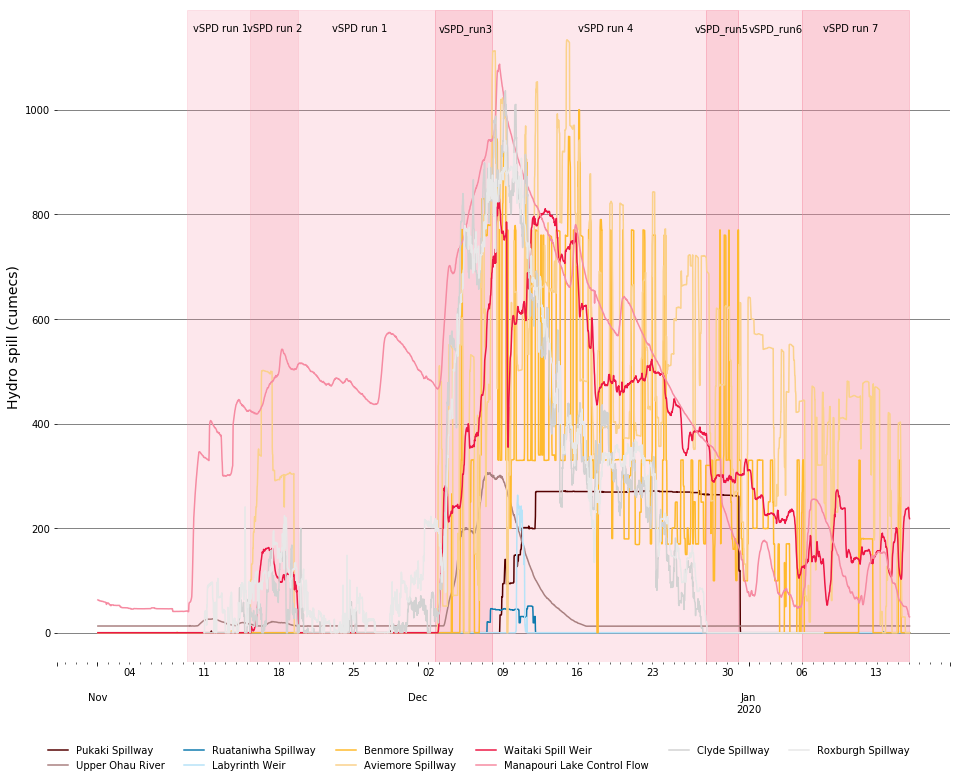

In [5]:
colours()
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
spill2.plot(ax=ax)
legend_format(ax, cols=6, ypos=-0.18)
plot_formatting(ax)
#UTS_period(ax)
plot_shading(ax, y_offset=1150)
ax.set_xlabel('')
ax.set_ylabel('Hydro spill (cumecs)', fontsize=14)

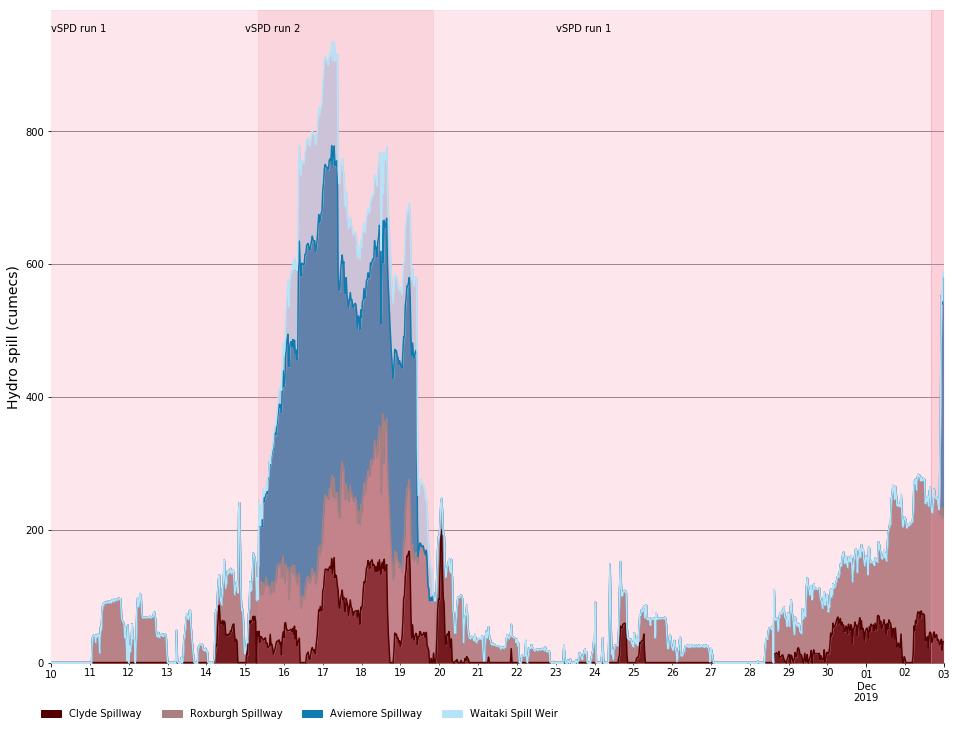

In [6]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
spill2["2019/11/10":"2019/12/2"].loc[:, ['Clyde Spillway', 'Roxburgh Spillway', 'Aviemore Spillway', 'Waitaki Spill Weir']].plot(kind='area', ax=ax)
plot_shading2(ax, y_offset=950)
ax.set_xlim([datetime(2019,11,10), datetime(2019,12,3)])
ax.set_xlabel('')
ax.set_ylabel('Hydro spill (cumecs)', fontsize=14)
legend_format(ax, ypos=-0.10)
plot_formatting(ax)

Text(2019-11-16 12:00:00, 2.03, '(+AVI/WTK spilling)')

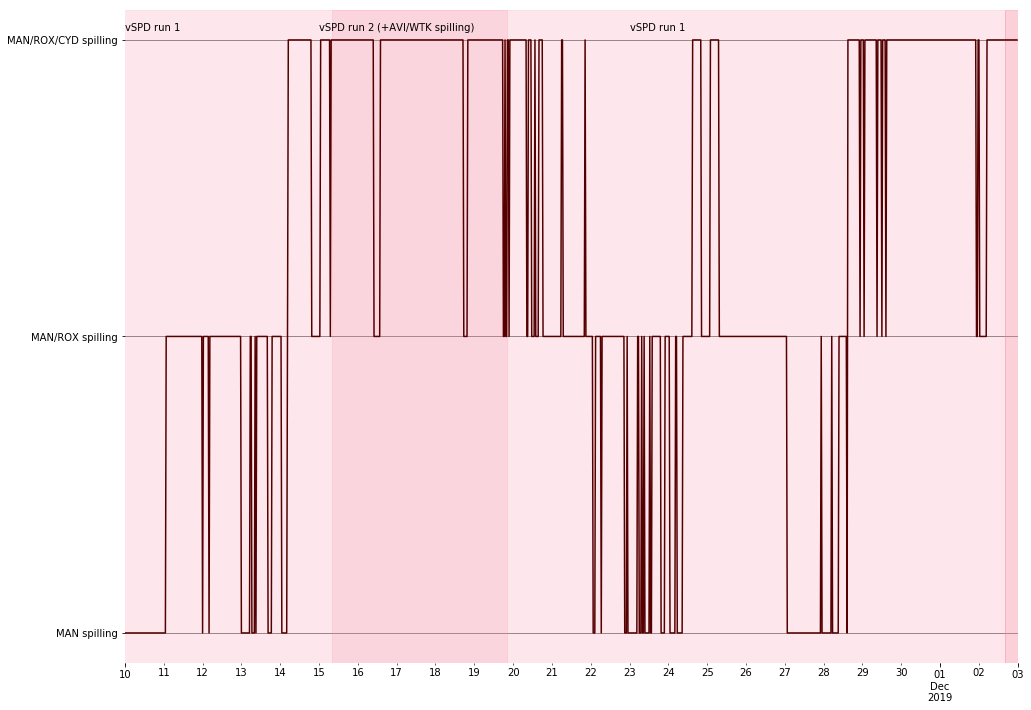

In [7]:
fig = plt.figure(1, figsize=[16,12])
ax = fig.add_subplot(111)
(spill2["2019/11/10":"2019/12/2"].loc[:, ['Clyde Spillway', 'Roxburgh Spillway']]>0).sum(axis=1).plot(ax=ax)
plot_shading2(ax, y_offset=2.03)
ax.set_xlim([datetime(2019,11,10), datetime(2019,12,3)])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['MAN spilling', 'MAN/ROX spilling', 'MAN/ROX/CYD spilling'])
plot_formatting(ax)
ax.text(datetime(2019,11,16,12), 2.03, '(+AVI/WTK spilling)')

In [8]:
ROX_BOOLEAN = (spill2["2019/11/10":"2019/12/2"].loc[:, ['Clyde Spillway', 'Roxburgh Spillway']]>0).sum(axis=1)==1
ROX_CYD_BOOLEAN = (spill2["2019/11/10":"2019/12/2"].loc[:, ['Clyde Spillway', 'Roxburgh Spillway']]>0).sum(axis=1)==2

In [9]:
# Load vSPD results using parquet files = this is FAST!
path = "vSPD_data/"

bc = vSPD_loader(path, basecase, csv=False)
bc2 = vSPD_loader(path, basecase2, csv=False)
bc3 = vSPD_loader(path, basecase3, csv=False)

# Load $0.01/MWh vSPD run
run1_001MWh = vSPD_loader(path, vSPDrun1_001MWh, csv=False)
run2_001MWh = vSPD_loader(path, vSPDrun2_001MWh, csv=False)
run3_001MWh = vSPD_loader(path, vSPDrun3_001MWh, csv=False)
run4_001MWh = vSPD_loader(path, vSPDrun4_001MWh, csv=False)
run5_001MWh = vSPD_loader(path, vSPDrun5_001MWh, csv=False)
run6_001MWh = vSPD_loader(path, vSPDrun6_001MWh, csv=False)
run7_001MWh = vSPD_loader(path, vSPDrun7_001MWh, csv=False)

# Load $6pt35/MWh vSPD run

run1_6pt35 = vSPD_loader(path, vSPDrun1_6pt35, csv=False)
run2_6pt35 = vSPD_loader(path, vSPDrun2_6pt35, csv=False)
run3_6pt35 = vSPD_loader(path, vSPDrun3_6pt35, csv=False)
run4_6pt35 = vSPD_loader(path, vSPDrun4_6pt35, csv=False)
run5_6pt35 = vSPD_loader(path, vSPDrun5_6pt35, csv=False)
run6_6pt35 = vSPD_loader(path, vSPDrun6_6pt35, csv=False)
run7_6pt35 = vSPD_loader(path, vSPDrun7_6pt35, csv=False)
# Sensitivity with ROX/CYD spilling for runs 1 and 2
run1_6pt35ROX = vSPD_loader(path, vSPDrun1_6pt35_ROX, csv=False)
run1_6pt35ROXCYD = vSPD_loader(path, vSPDrun1_6pt35_ROXCYD, csv=False)
run2_6pt35ROXCYD = vSPD_loader(path, vSPDrun2_6pt35_ROXCYD, csv=False)

# Load $10/MWh vSPD run
run1_10MWh = vSPD_loader(path, vSPDrun1_10MWh, csv=False)
run2_10MWh = vSPD_loader(path, vSPDrun2_10MWh, csv=False)
run3_10MWh = vSPD_loader(path, vSPDrun3_10MWh, csv=False)
run4_10MWh = vSPD_loader(path, vSPDrun4_10MWh, csv=False)
run5_10MWh = vSPD_loader(path, vSPDrun5_10MWh, csv=False)
run6_10MWh = vSPD_loader(path, vSPDrun6_10MWh, csv=False)
run7_10MWh = vSPD_loader(path, vSPDrun7_10MWh, csv=False)

# Load $20/MWh vSPD run
run1_20MWh = vSPD_loader(path, vSPDrun1_20MWh, csv=False)
run2_20MWh = vSPD_loader(path, vSPDrun2_20MWh, csv=False)
run3_20MWh = vSPD_loader(path, vSPDrun3_20MWh, csv=False)
run4_20MWh = vSPD_loader(path, vSPDrun4_20MWh, csv=False)
run5_20MWh = vSPD_loader(path, vSPDrun5_20MWh, csv=False)
run6_20MWh = vSPD_loader(path, vSPDrun6_20MWh, csv=False)
run7_20MWh = vSPD_loader(path, vSPDrun7_20MWh, csv=False)

# Load $30/MWh vSPD run
run1_30MWh = vSPD_loader(path, vSPDrun1_30MWh, csv=False)
run2_30MWh = vSPD_loader(path, vSPDrun2_30MWh, csv=False)
run3_30MWh = vSPD_loader(path, vSPDrun3_30MWh, csv=False)
run4_30MWh = vSPD_loader(path, vSPDrun4_30MWh, csv=False)
run5_30MWh = vSPD_loader(path, vSPDrun5_30MWh, csv=False)
run6_30MWh = vSPD_loader(path, vSPDrun6_30MWh, csv=False)
run7_30MWh = vSPD_loader(path, vSPDrun7_30MWh, csv=False)


Loading: vSPD_data/LSI_Flood_Basecase_BidResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_SystemResults.parquet
Loading: vSPD_data/LSI_Flood_Basecase_MNodeConstraintResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_ScarcityResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_OfferResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_NodeResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_BrConstraintResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_ReserveResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_SummaryResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_BusResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_TraderResults.parquet
Loading: vSPD_data/LSI_Flood_Basecase_BranchResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_BidResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_SystemResults.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_MNodeConstraintResults_TP.parquet
Loading: vSPD_data/LSI_Flood_Basecase_2_Sc

In [10]:
# Piece together the three base caser runs - do this separately (three runs as UTS analysis was on-going at the time).
BC={}
for k in files.keys():
    print(k)
    BC[k] = bc[k].append(bc2[k]).append(bc3[k])

bid_res
sys_res
MNC_res
scr_res
gen_res
nod_res
brC_res
res_res
sum_res
bus_res
trd_res
brh_res


In [11]:
# stitch together the three vSPD low offer runs to recreate a vSPD run1 time series 
run1_6pt35_v2 = piece_together_vSPD_run1(run1_6pt35.copy(), run1_6pt35ROX.copy(), run1_6pt35ROXCYD.copy(),
                                         ROX_BOOLEAN, ROX_CYD_BOOLEAN, files)

In [12]:
# Piece together the 7 time periods for each of the different simulations
ALL_RUNS_001MWh = piece_together_vSPD_runs(run1_001MWh, run2_001MWh, run3_001MWh, run4_001MWh,
                                          run5_001MWh, run6_001MWh, run7_001MWh, files)
ALL_RUNS_6pt35 = piece_together_vSPD_runs(run1_6pt35, run2_6pt35, run3_6pt35, run4_6pt35,
                                          run5_6pt35, run6_6pt35, run7_6pt35, files)
ALL_RUNS_6pt35_v2 = piece_together_vSPD_runs(run1_6pt35_v2, run2_6pt35ROXCYD, run3_6pt35, run4_6pt35,
                                          run5_6pt35, run6_6pt35, run7_6pt35, files)
ALL_RUNS_10MWh = piece_together_vSPD_runs(run1_10MWh, run2_10MWh, run3_10MWh, run4_10MWh,
                                          run5_10MWh, run6_10MWh, run7_10MWh, files)
ALL_RUNS_20MWh = piece_together_vSPD_runs(run1_20MWh, run2_20MWh, run3_20MWh, run4_20MWh,
                                          run5_20MWh, run6_20MWh, run7_20MWh, files)
ALL_RUNS_30MWh = piece_together_vSPD_runs(run1_30MWh, run2_30MWh, run3_30MWh, run4_30MWh,
                                          run5_30MWh, run6_30MWh, run7_30MWh, files)


bid_res
sys_res
MNC_res
scr_res
gen_res
nod_res
brC_res
res_res
sum_res
bus_res
trd_res
brh_res
bid_res
sys_res
MNC_res
scr_res
gen_res
nod_res
brC_res
res_res
sum_res
bus_res
trd_res
brh_res
bid_res
sys_res
MNC_res
scr_res
gen_res
nod_res
brC_res
res_res
sum_res
bus_res
trd_res
brh_res
bid_res
sys_res
MNC_res
scr_res
gen_res
nod_res
brC_res
res_res
sum_res
bus_res
trd_res
brh_res
bid_res
sys_res
MNC_res
scr_res
gen_res
nod_res
brC_res
res_res
sum_res
bus_res
trd_res
brh_res
bid_res
sys_res
MNC_res
scr_res
gen_res
nod_res
brC_res
res_res
sum_res
bus_res
trd_res
brh_res


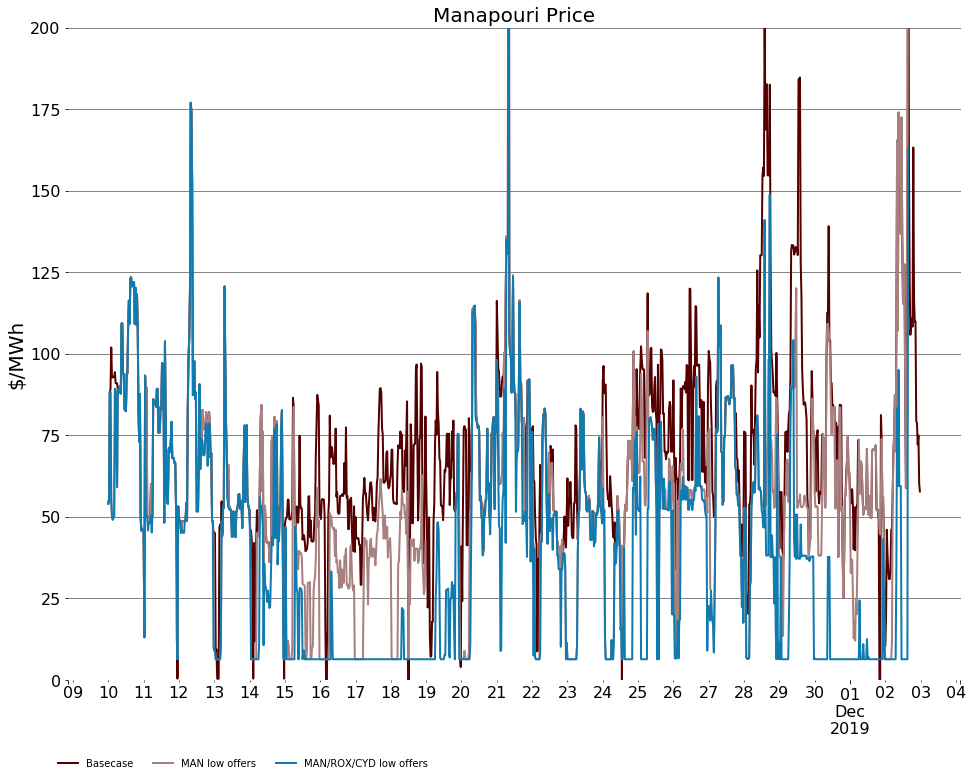

In [13]:
strt = "2019/11/10"
end = "2019/12/2"

MAN_price = pd.DataFrame({'Basecase': BC['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'][strt: end],
                          'MAN low offers': ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'][strt: end],
                          'MAN/ROX/CYD low offers': ALL_RUNS_6pt35_v2['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'][strt: end]})
CYD_price = pd.DataFrame({'Basecase': BC['nod_res']['Price ($/MWh)'].unstack()['CYD2201 CYD0'][strt: end],
                          'MAN low offers': ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['CYD2201 CYD0'][strt: end],
                          'MAN/ROX/CYD low offers': ALL_RUNS_6pt35_v2['nod_res']['Price ($/MWh)'].unstack()['CYD2201 CYD0'][strt: end]})
BEN_price = pd.DataFrame({'Basecase': BC['nod_res']['Price ($/MWh)'].unstack()['BEN2202 BEN0'][strt: end],
                          'MAN low offers': ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['BEN2202 BEN0'][strt: end],
                          'MAN/ROX/CYD low offers': ALL_RUNS_6pt35_v2['nod_res']['Price ($/MWh)'].unstack()['BEN2202 BEN0'][strt: end]})
                    
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
MAN_price.plot(ax=ax, lw=2, label='MAN2201 (basecase)', fontsize=16)
ax.set_ylabel('$/MWh', fontsize=20)
ax.set_xlabel('', fontsize=20)
ax.set_ylim([0, 200])
ax.set_title('Manapouri Price', fontsize=20)
plot_formatting(ax)
legend_format(ax)


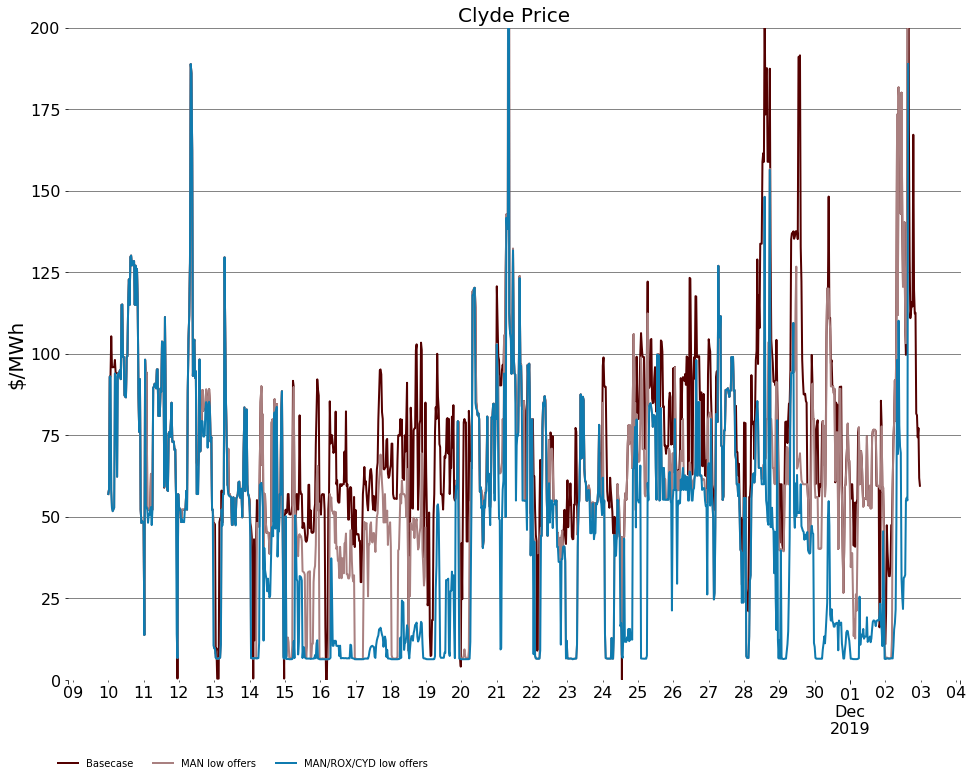

In [14]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
CYD_price.plot(ax=ax, lw=2, fontsize=16)
ax.set_ylabel('$/MWh', fontsize=20)
ax.set_xlabel('', fontsize=20)
ax.set_ylim([0, 200])
ax.set_title('Clyde Price', fontsize=20)
plot_formatting(ax)
legend_format(ax)

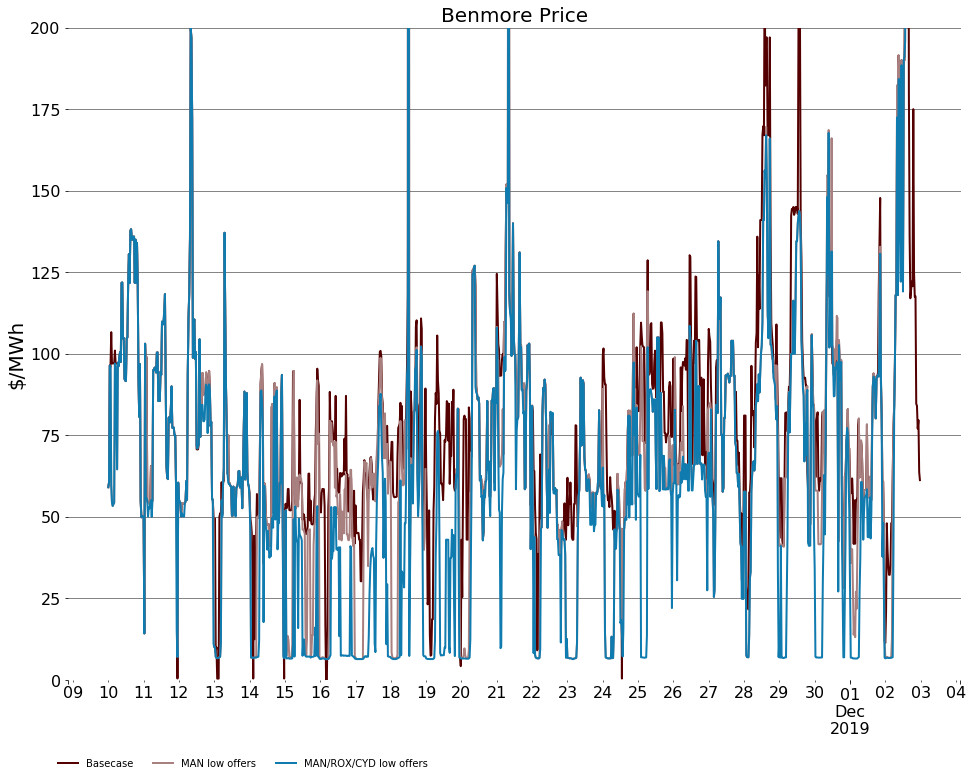

In [15]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
BEN_price.plot(ax=ax, lw=2, fontsize=16)
ax.set_ylabel('$/MWh', fontsize=20)
ax.set_xlabel('', fontsize=20)
ax.set_ylim([0, 200])
ax.set_title('Benmore Price', fontsize=20)
plot_formatting(ax)
legend_format(ax)

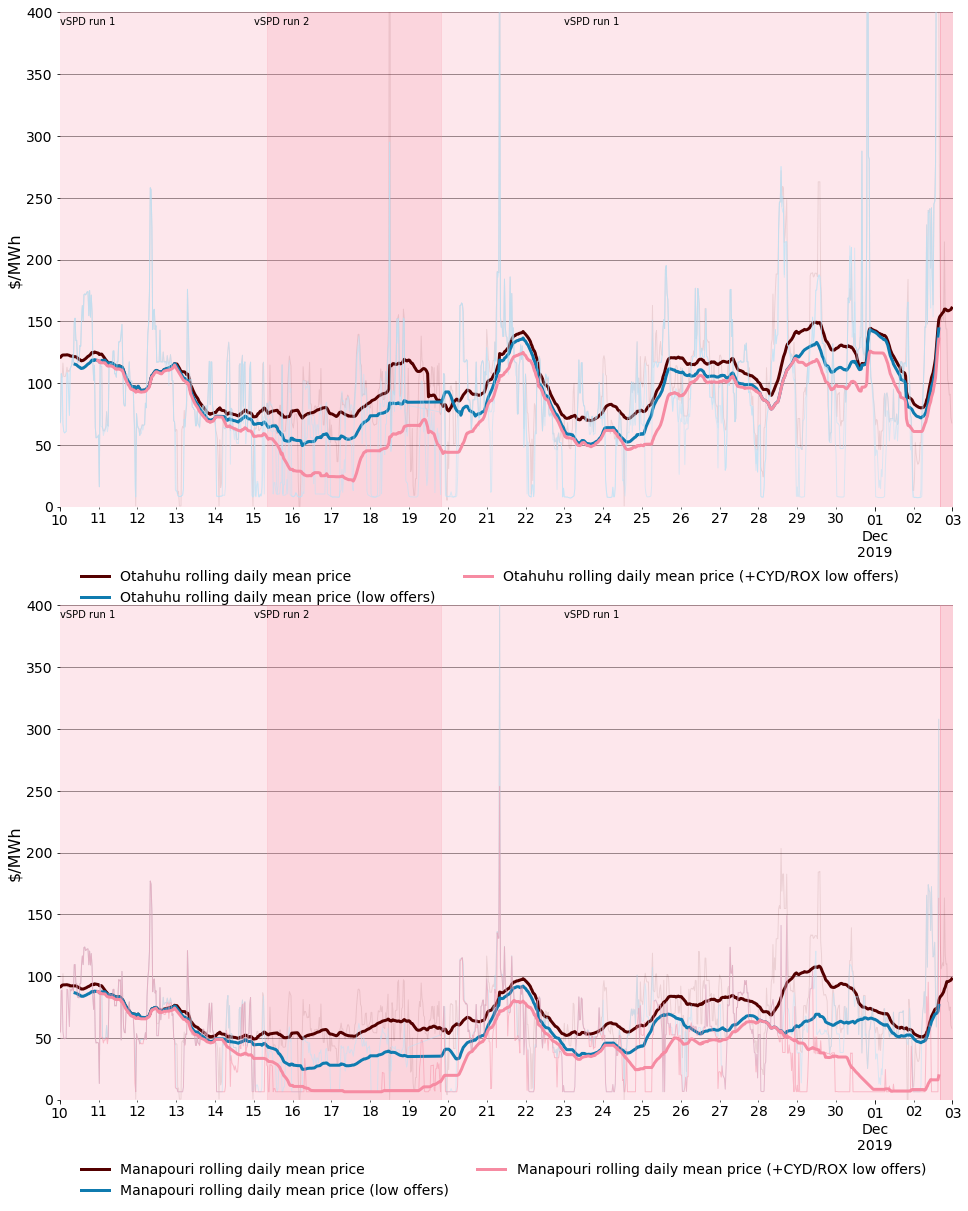

In [20]:
fig = plt.figure(1, figsize=[16,20])
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#MAN
BC['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'][strt: end].plot(ax=ax2, lw=1, alpha=0.1, fontsize=14, color=c_p['br1'], label='')
BC['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'].rolling(48).mean()[strt: end].plot(ax=ax2, lw=3, fontsize=14, label='Manapouri rolling daily mean price')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'][strt: end].plot(ax=ax2, lw=1, alpha=0.5, fontsize=14, color=c_p['bl2'], label='')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'].rolling(48).mean()[strt: end].plot(ax=ax2, lw=3, fontsize=14, color=c_p['bl1'], label='Manapouri rolling daily mean price (low offers)' )
ALL_RUNS_6pt35_v2['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'][strt: end].plot(ax=ax2, lw=1, alpha=0.5, fontsize=14, color=c_p['rd2'], label='')
ALL_RUNS_6pt35_v2['nod_res']['Price ($/MWh)'].unstack()['MAN2201 MAN0'].rolling(48).mean()[strt: end].plot(ax=ax2, lw=3, fontsize=14, color=c_p['rd2'], label='Manapouri rolling daily mean price (+CYD/ROX low offers)' )
#OTA
BC['nod_res']['Price ($/MWh)'].unstack()['OTA2201'][strt: end].plot(ax=ax, lw=1, alpha=0.1, fontsize=14, color=c_p['br1'], label='')
BC['nod_res']['Price ($/MWh)'].unstack()['OTA2201'].rolling(48).mean()[strt: end].plot(ax=ax, lw=3, fontsize=14, label='Otahuhu rolling daily mean price')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['OTA2201'][strt: end].plot(ax=ax, lw=1, alpha=0.5, fontsize=14, color=c_p['bl2'], label='')
ALL_RUNS_6pt35['nod_res']['Price ($/MWh)'].unstack()['OTA2201'].rolling(48).mean()[strt: end].plot(ax=ax, lw=3, fontsize=14, color=c_p['bl1'], label='Otahuhu rolling daily mean price (low offers)' )
ALL_RUNS_6pt35_v2['nod_res']['Price ($/MWh)'].unstack()['OTA2201'][strt: end].plot(ax=ax, lw=1, alpha=0.5, fontsize=14, color=c_p['bl2'], label='')
ALL_RUNS_6pt35_v2['nod_res']['Price ($/MWh)'].unstack()['OTA2201'].rolling(48).mean()[strt: end].plot(ax=ax, lw=3, fontsize=14, color=c_p['rd2'], label='Otahuhu rolling daily mean price (+CYD/ROX low offers)' )

ax.set_ylabel('$/MWh', fontsize=16)
ax.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('$/MWh', fontsize=16)
ax.set_xlim([datetime(2019,11,10), datetime(2019,12,3)])
ax2.set_xlim([datetime(2019,11,10), datetime(2019,12,3)])
ax.set_ylim([0, 400])
ax2.set_ylim([0, 400])
plot_formatting(ax)
plot_formatting(ax2)
plot_shading2(ax, y_offset=390)
plot_shading2(ax2, y_offset=390)
legend_format(ax, cols=2, ypos=-0.225, xpos=0.01, fontsize=14)
legend_format(ax2, cols=2, ypos=-0.225, xpos=0.01, fontsize=14)



Text(0.5, 1.0, 'Difference in System Load Cost')

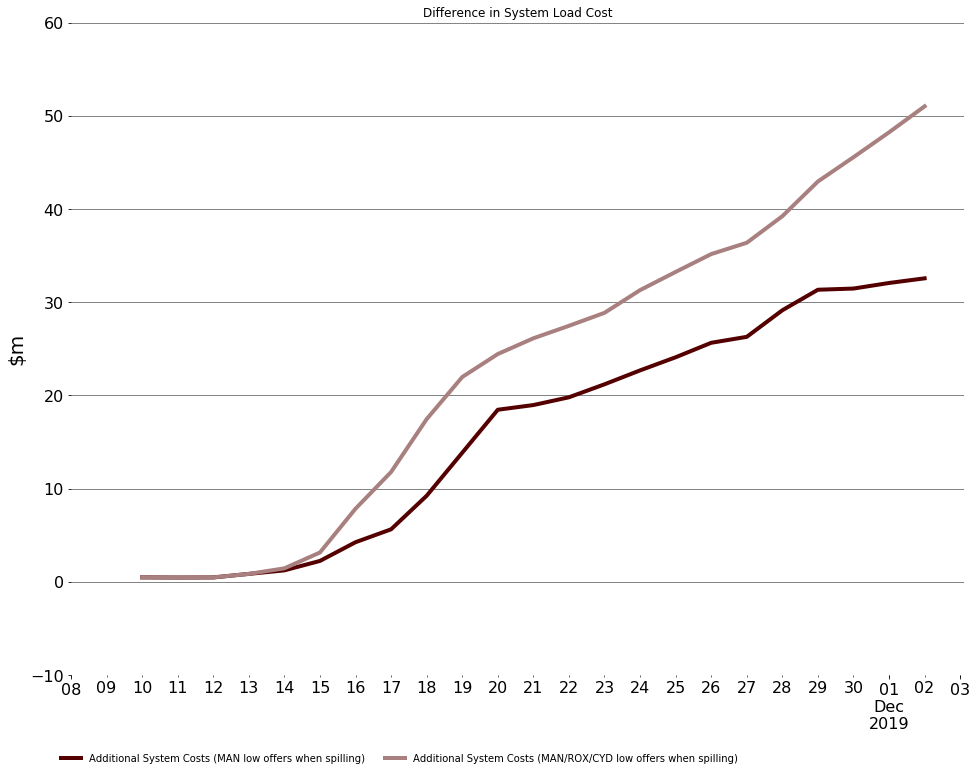

In [21]:
diff_NOV_costs_v1 = pd.DataFrame({"System Load Cost (MAN spilling)": ALL_RUNS_6pt35["sys_res"]['SystemLoadCost ($)'].reset_index(level=1, drop=True)[strt: end].cumsum()/1e6,
                               "Basecase System Load cost": (BC["sys_res"]['SystemLoadCost ($)'].reset_index(level=1, drop=True)[strt: end].cumsum()/1e6)})
diff_NOV_costs_v2 = pd.DataFrame({"System Load Cost (MAN/CYD/ROX spilling)": ALL_RUNS_6pt35_v2["sys_res"]['SystemLoadCost ($)'].reset_index(level=1, drop=True)[strt:  end].cumsum()/1e6,
                               "Basecase System Load cost": (BC["sys_res"]['SystemLoadCost ($)'].reset_index(level=1, drop=True)[strt: end].cumsum()/1e6)})
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
vSPDrun1MAN_SC = ((-diff_NOV_costs_v1.diff(axis=1))["System Load Cost (MAN spilling)"]).interpolate()
vSPDrun1MANCYDROX_SC = (-diff_NOV_costs_v2.diff(axis=1))["System Load Cost (MAN/CYD/ROX spilling)"]
vSPDrun1MAN_SC.plot(ax=ax, lw=4, fontsize=16, label='Additional System Costs (MAN low offers when spilling)')
vSPDrun1MANCYDROX_SC.plot(ax=ax, lw=4, fontsize=16, label='Additional System Costs (MAN/ROX/CYD low offers when spilling)')
ax.set_ylim([-10, 60])
plot_formatting(ax)
legend_format(ax)
ax.set_ylabel('$m', fontsize=20)
ax.set_xlabel('')
ax.set_title('Difference in System Load Cost')

Text(0.5, 1.0, 'Difference in System Load Cost')

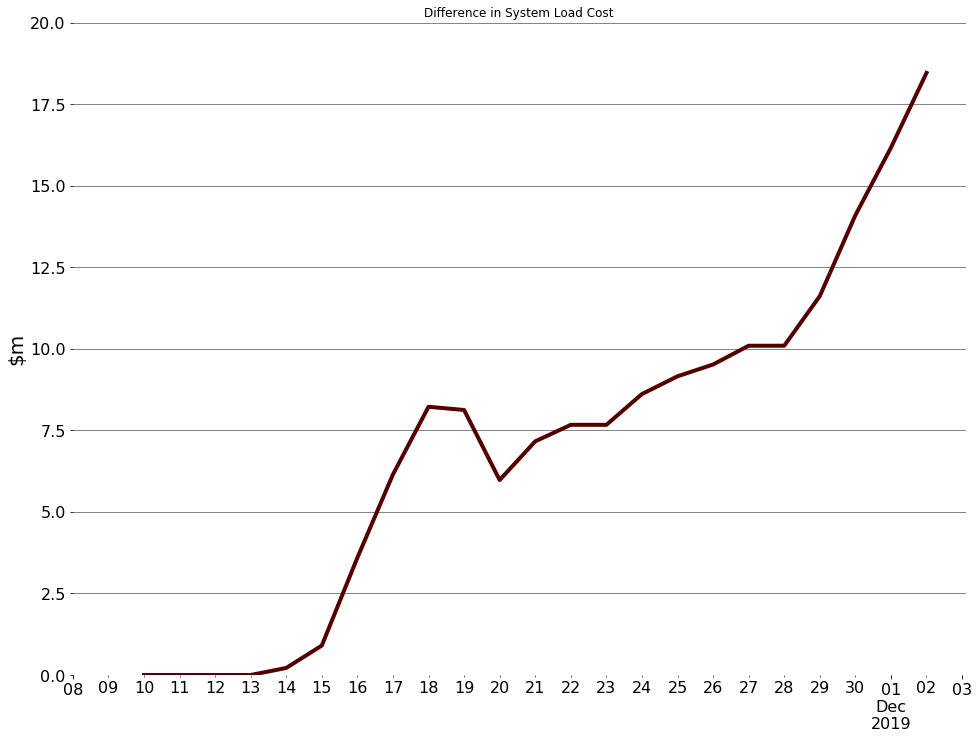

In [22]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
(vSPDrun1MANCYDROX_SC-vSPDrun1MAN_SC).plot(ax=ax, lw=4, fontsize=16, label='')
ax.set_ylim([0, 20])
plot_formatting(ax)
ax.set_ylabel('$m', fontsize=20)
ax.set_xlabel('')
ax.set_title('Difference in System Load Cost')

In [23]:
# Return HVDC flow for different vSPD simulations
HVDC_BC = get_hvdc_flow(BC)["2019/11":]
HVDC_001MWh = get_hvdc_flow(ALL_RUNS_001MWh)["2019/11":]  
HVDC_6pt35 = get_hvdc_flow(ALL_RUNS_6pt35)["2019/11":]
HVDC_6pt35v2 = get_hvdc_flow(ALL_RUNS_6pt35_v2)["2019/11":]
HVDC_10MWh = get_hvdc_flow(ALL_RUNS_10MWh)["2019/11":]
HVDC_20MWh = get_hvdc_flow(ALL_RUNS_20MWh)["2019/11":]
HVDC_30MWh = get_hvdc_flow(ALL_RUNS_30MWh)["2019/11":]

In [24]:
HVDC = pd.DataFrame({'Basecase (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_BC.mean(), HVDC_BC.sum()/2000.0): HVDC_BC,
                     'LSI offers@$0.01/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_001MWh.mean(), HVDC_001MWh.sum()/2000.0): HVDC_001MWh,
                     'LSI offers@$6.35/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_6pt35.mean(), HVDC_6pt35.sum()/2000.0): HVDC_6pt35,
                     'LSI offers@$6.35/MWh v2 (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_6pt35v2.mean(), HVDC_6pt35v2.sum()/2000.0): HVDC_6pt35v2,
                     'LSI offers@$10/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_10MWh.mean(), HVDC_10MWh.sum()/2000.0): HVDC_10MWh,
                     'LSI offers@$20/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_20MWh.mean(), HVDC_20MWh.sum()/2000.0): HVDC_20MWh,
                     'LSI offers@$30/MWh (mean HVDC flow north: %iMW/%iGWh)' % (HVDC_30MWh.mean(), HVDC_30MWh.sum()/2000.0): HVDC_30MWh})

Text(0.5, 1.0, 'HVDC flows for Basecase and vSPD runs (December 2019)')

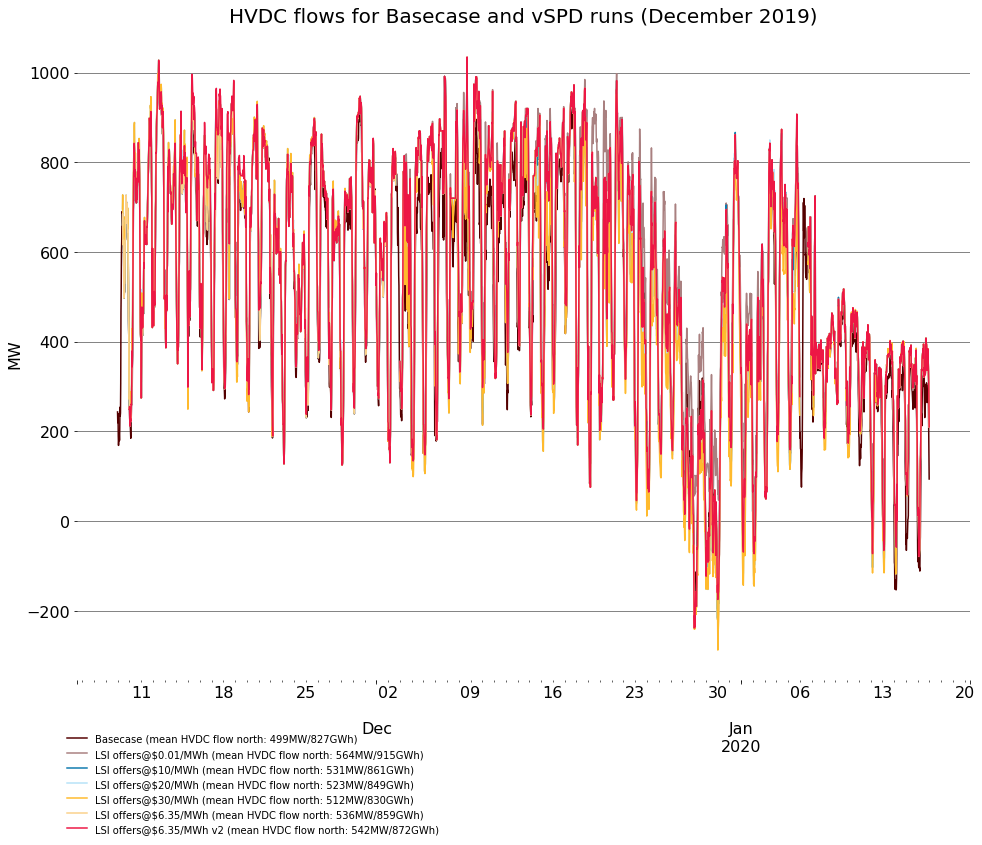

In [25]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
HVDC.plot(ax=ax, fontsize=16)
plot_formatting(ax)
legend_format(ax, cols=1, ypos=-0.25)
ax.set_xlabel('')
ax.set_ylabel('MW', fontsize=16)
ax.set_title('HVDC flows for Basecase and vSPD runs (December 2019)', fontsize=20)

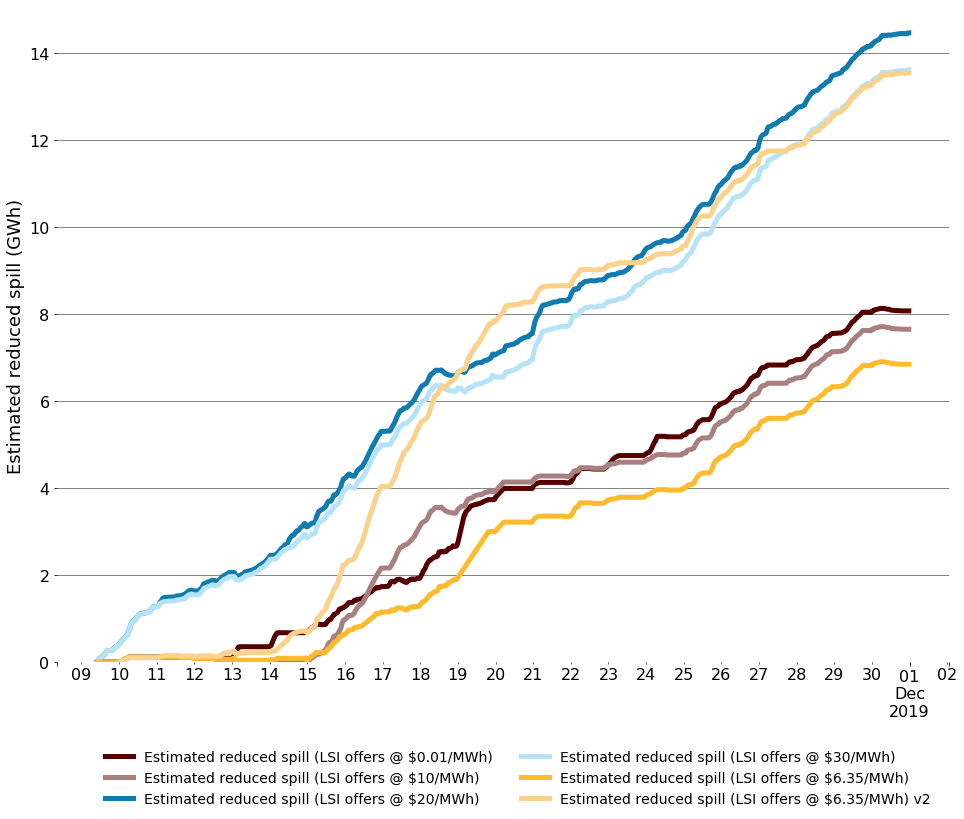

In [26]:
HVDC_diff_001MWh = (HVDC_001MWh-HVDC_BC).fillna(method='ffill')
HVDC_diff_6pt35 = (HVDC_6pt35-HVDC_BC).fillna(method='ffill')
HVDC_diff_6pt35_v2 = (HVDC_6pt35v2-HVDC_BC).fillna(method='ffill')
HVDC_diff_10MWh = (HVDC_10MWh-HVDC_BC).fillna(method='ffill')
HVDC_diff_20MWh = (HVDC_20MWh-HVDC_BC).fillna(method='ffill')
HVDC_diff_30MWh = (HVDC_30MWh-HVDC_BC).fillna(method='ffill')

HVDC_diff_001MWh_cs = HVDC_diff_001MWh.cumsum()/2e3
HVDC_diff_6pt35_cs = HVDC_diff_6pt35.cumsum()/2e3
HVDC_diff_6pt35_cs_v2 = HVDC_diff_6pt35_v2.cumsum()/2e3
HVDC_diff_10MWh_cs = HVDC_diff_10MWh.cumsum()/2e3
HVDC_diff_20MWh_cs = HVDC_diff_20MWh.cumsum()/2e3
HVDC_diff_30MWh_cs = HVDC_diff_30MWh.cumsum()/2e3

df = pd.DataFrame({'Estimated reduced spill (LSI offers @ $0.01/MWh)': HVDC_diff_001MWh_cs,
                   'Estimated reduced spill (LSI offers @ $6.35/MWh)': HVDC_diff_6pt35_cs,
                   'Estimated reduced spill (LSI offers @ $6.35/MWh) v2': HVDC_diff_6pt35_cs_v2,
                   'Estimated reduced spill (LSI offers @ $10/MWh)': HVDC_diff_10MWh_cs,
                   'Estimated reduced spill (LSI offers @ $20/MWh)': HVDC_diff_20MWh_cs,
                   'Estimated reduced spill (LSI offers @ $30/MWh)': HVDC_diff_30MWh_cs})

fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
df["2019/11"].plot(lw=5, ax=ax, fontsize=16,)
ax.set_xlabel('')
ax.set_ylabel('Estimated reduced spill (GWh)', fontsize=18)
ax.set_ylim([0, 15])
plot_formatting(ax)
legend_format(ax, fontsize=14, xpos=0.04, ypos=-.24, cols=2)


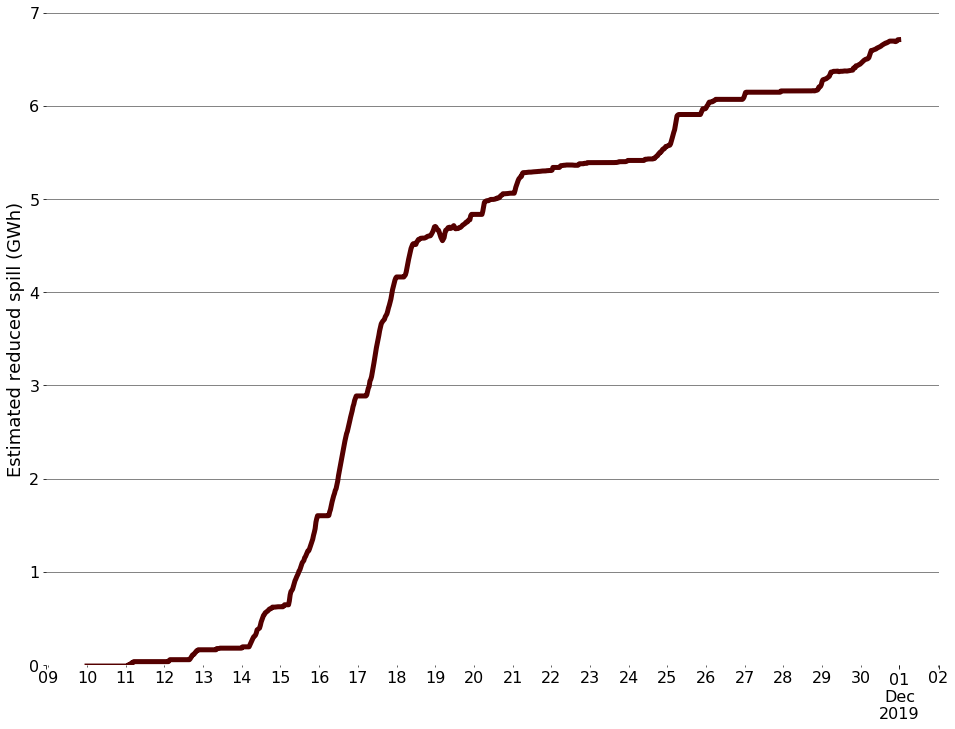

In [27]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
(df["2019/11"]['Estimated reduced spill (LSI offers @ $6.35/MWh) v2'] - df["2019/11"]['Estimated reduced spill (LSI offers @ $6.35/MWh)']).plot(lw=5, ax=ax, fontsize=16,)
ax.set_xlabel('')
ax.set_ylabel('Estimated reduced spill (GWh)', fontsize=18)
ax.set_ylim([0, 7])
plot_formatting(ax)

In [94]:
brh_c_001 = ALL_RUNS_001MWh['brC_res']['Price ($/MWh)'].unstack()
brh_c_6pt35 = ALL_RUNS_6pt35['brC_res']['Price ($/MWh)'].unstack()
brh_c_6pt35_v2 = ALL_RUNS_6pt35_v2['brC_res']['Price ($/MWh)'].unstack()
brh_c_10 = ALL_RUNS_10MWh['brC_res']['Price ($/MWh)'].unstack()
brh_c_20 = ALL_RUNS_20MWh['brC_res']['Price ($/MWh)'].unstack()
brh_c_30 = ALL_RUNS_30MWh['brC_res']['Price ($/MWh)'].unstack()

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


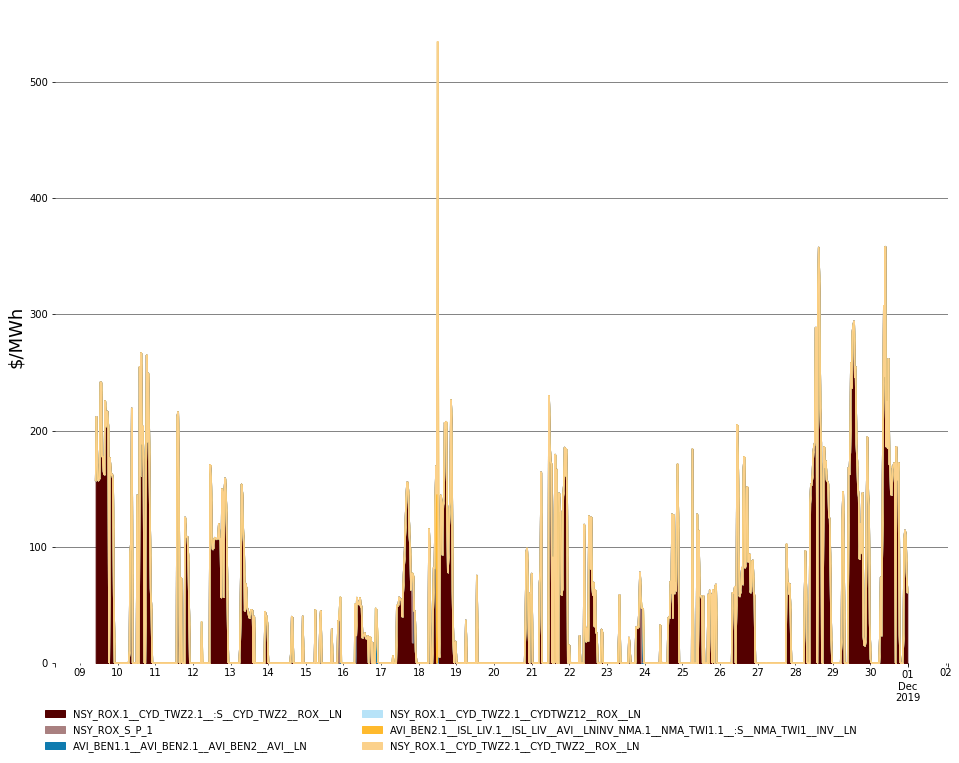

In [102]:
#(brh_c_30.describe().T.loc[:, 'count'] * brh_c_30.describe().T.loc[:, 'mean']).sort_values()
brh_of_int = ['NSY_ROX.1__CYD_TWZ2.1__:S__CYD_TWZ2__ROX__LN', 
            'NSY_ROX_S_P_1',
              'AVI_BEN1.1__AVI_BEN2.1__AVI_BEN2__AVI__LN',
              'NSY_ROX.1__CYD_TWZ2.1__CYDTWZ12__ROX__LN',
              'AVI_BEN2.1__ISL_LIV.1__ISL_LIV__AVI__LN'
            'INV_NMA.1__NMA_TWI1.1__:S__NMA_TWI1__INV__LN',
              'NSY_ROX.1__CYD_TWZ2.1__CYD_TWZ2__ROX__LN'
             ] 

fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
brh_c_30.loc[:, brh_of_int]["2019/11"].plot(kind='area', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('$/MWh', fontsize=18)
plot_formatting(ax)
legend_format(ax, cols=2, ypos=-.15)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


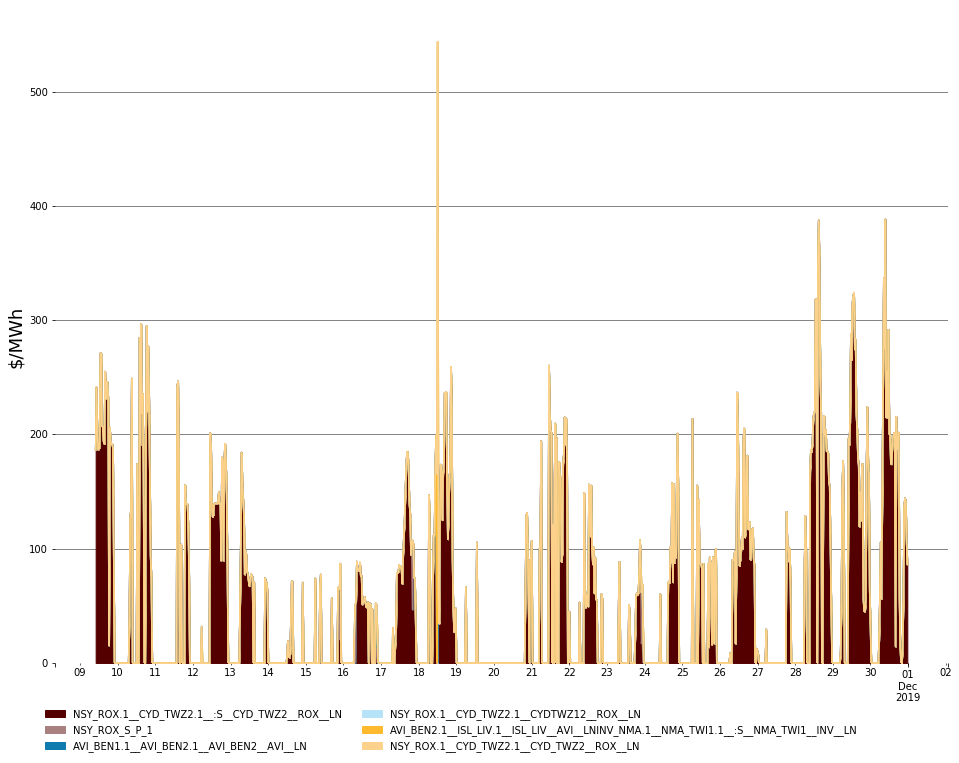

In [104]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
brh_c_20.loc[:, brh_of_int]["2019/11"].plot(kind='area',ax=ax)
ax.set_xlabel('')
ax.set_ylabel('$/MWh', fontsize=18)
plot_formatting(ax)
legend_format(ax, cols=2, ypos=-.15)


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


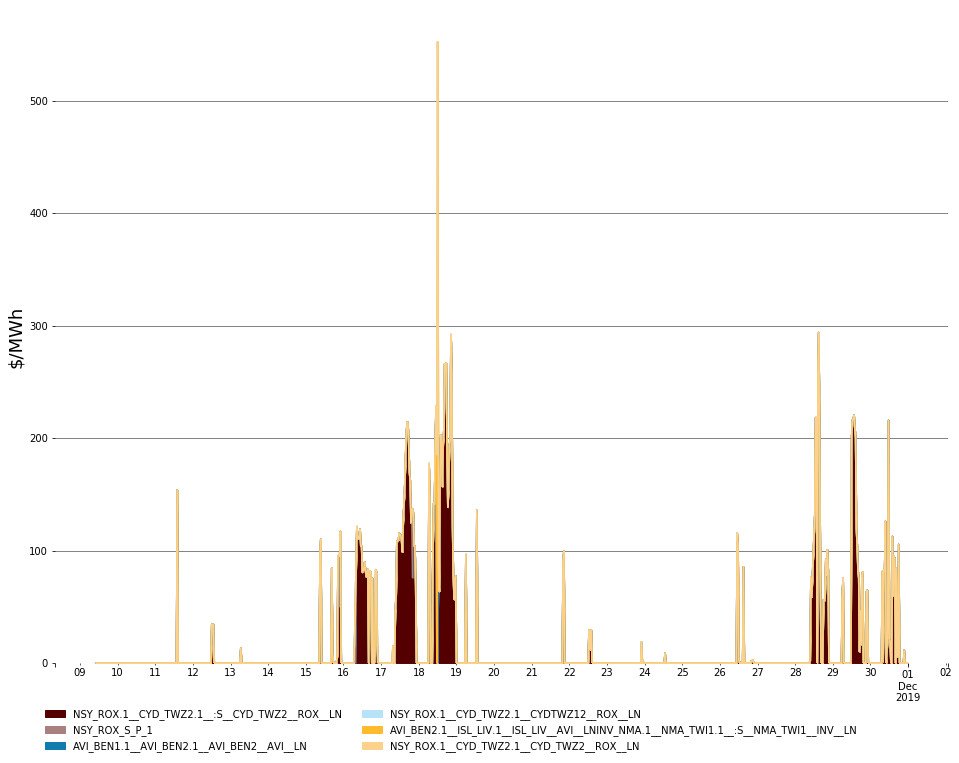

In [100]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
brh_c_10.loc[:, brh_of_int]["2019/11"].plot(kind='area',ax=ax)
ax.set_xlabel('')
ax.set_ylabel('$/MWh', fontsize=18)
plot_formatting(ax)
legend_format(ax, cols=2, ypos=-.15)


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


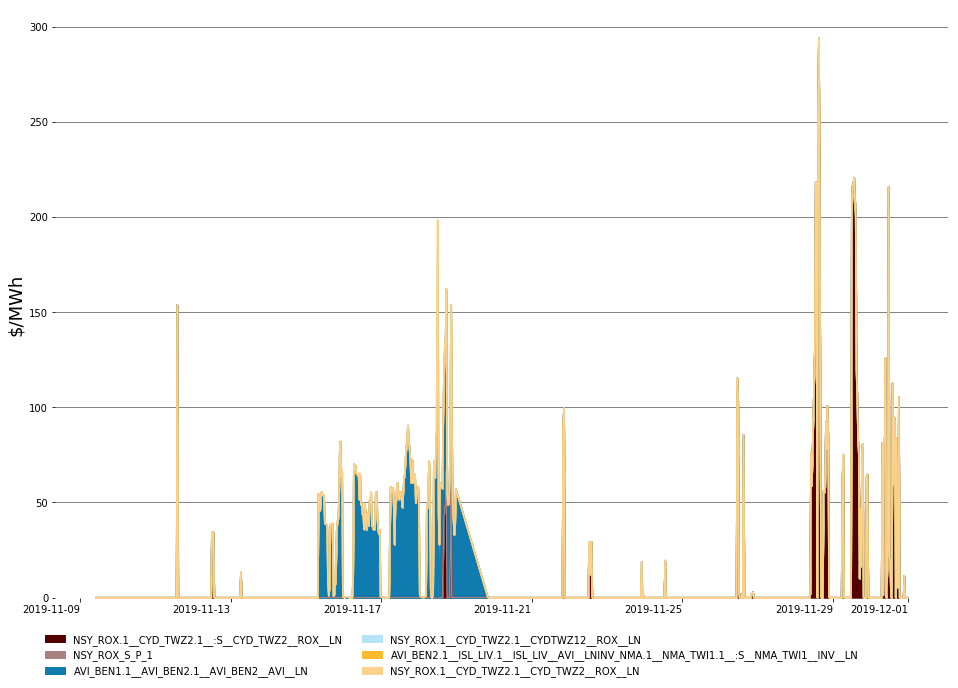

In [97]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
brh_c_6pt35.loc[:, brh_of_int]["2019/11"].plot(kind='area',ax=ax)
ax.set_xlabel('')
ax.set_ylabel('$/MWh', fontsize=18)
plot_formatting(ax)
legend_format(ax, cols=2, ypos=-.15)


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


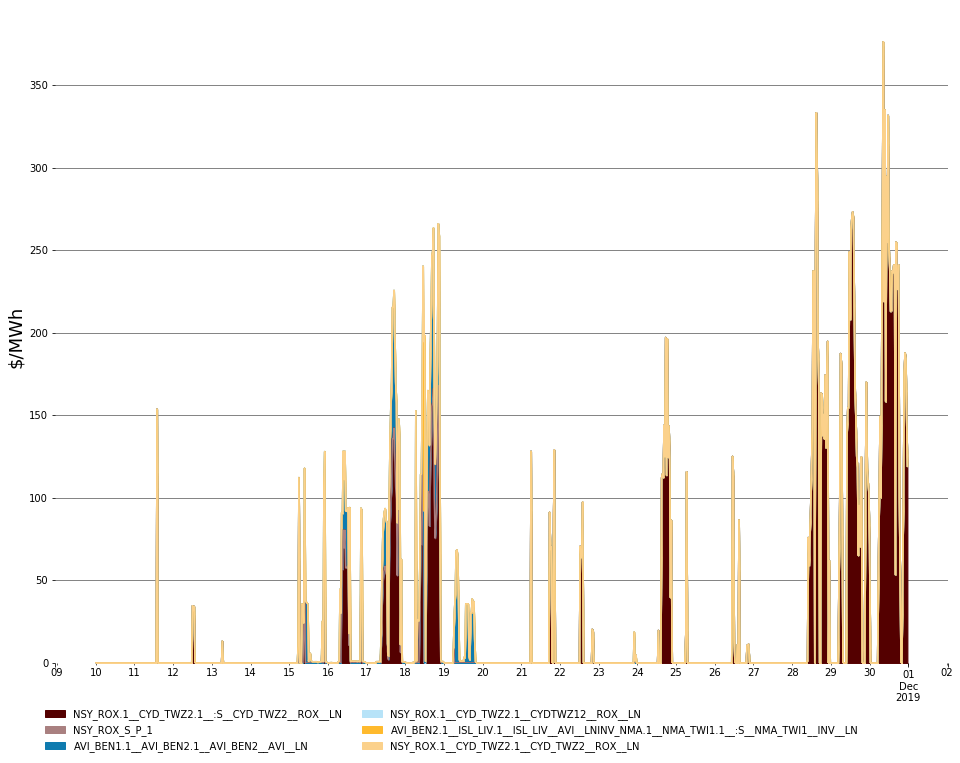

In [96]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
brh_c_6pt35_v2.loc[:, brh_of_int]["2019/11"].plot(kind='area',ax=ax)
ax.set_xlabel('')
ax.set_ylabel('$/MWh', fontsize=18)
plot_formatting(ax)
legend_format(ax, cols=2, ypos=-.15)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


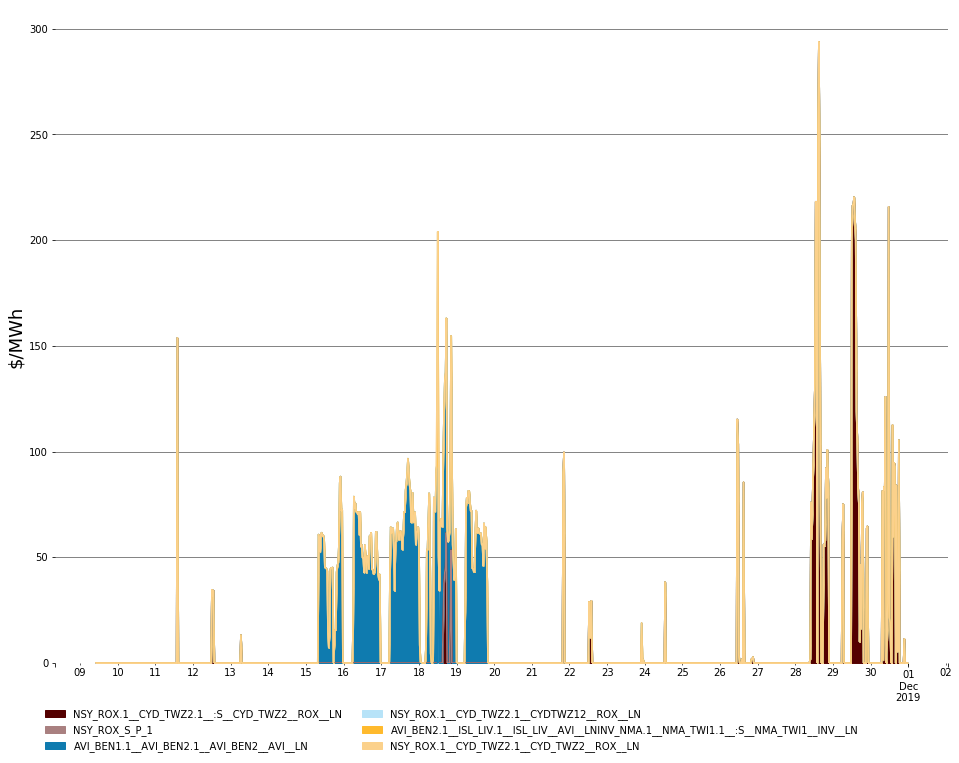

In [98]:
fig = plt.figure(1, figsize=[16, 12])
ax = fig.add_subplot(111)
brh_c_001.loc[:, brh_of_int]["2019/11"].plot(kind='area',ax=ax)
ax.set_xlabel('')
ax.set_ylabel('$/MWh', fontsize=18)
plot_formatting(ax)
legend_format(ax, cols=2, ypos=-.15)
